# project : investigate a data set

## Introduction

I choose to work on the tmbd movies data set prvided from kaggle the data set contains 100866 rows and 20 columns contain different information about the movies as name, summery and release date. The questions we want to find the answers to by analyzing this data are

- does the most popular movies relate to highest voted movies or highest vote count?
- Is the highest budget movie the highest earning or the highest revenue?
- what year have more movies released?
- what the average investment per year in the movies industry?
- who is the director made more movies than others?
- what is the longest movie?
- what is the averagetime for a movie?
- what are the movies made by Christopher Nolan and James Cameron(my fav diretor)?

## Data wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("tmdb-movies.csv")
#to load the csv file into the data frame

In [3]:
df.head()
#to see the first 5 rows in the data frame

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.nunique() 
#numnique function give me the number of unique valued in each column

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.duplicated().sum() 
#to know number of duplicated rows in the data frame

1

## Data cleaning
- find the earning of each movie.
- remove unwanted columns(id, imbd_id, cast, homepage, tagline, keywords, budget_adj, revenue_adj)."
- remove duplicated rows.
- relase data should be in date format.
- remove rows with null values.

### 1- find earning of each movie.
we need to find the earnings of each movie.

In [8]:
df['earning'] = df['revenue'] - df['budget'] 
#to get the earning I subtract the budget from the total revenue and put the answer in a new column.

### 2- removing unused columns.
first drop unwanted columns (columns won't be used) using for loob and drop method.

In [9]:
columns = ['id', 'homepage', 'tagline', 'budget_adj', 'revenue_adj']
for i in columns:
    df.drop(i, axis='columns', inplace=True)

#### check the columns are removed and earning column is added.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   keywords              9373 non-null   object 
 8   overview              10862 non-null  object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  release_date          10866 non-null  object 
 13  vote_count            10866 non-null  int64  
 14  vote_average          10866 non-null  float64
 15  release_year       

### 3- drop the duplicated row

In [11]:
df.drop_duplicates(inplace = True)
# drop_duplicates method removeduplicates from dataframe

### 4- make release_date in datetime format.

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'])
# using the to_datetime() method built in the pandas library

#### rearrange the data frame columns to make things easily to work with.

In [13]:
df = df[['imdb_id','original_title', 'release_date', 'runtime', 'director','cast', 'budget', 'revenue', 'earning', 'production_companies',
         'genres','keywords', 'popularity', 'vote_average', 'vote_count', 'overview', 'release_year']]

### 5- drop the null values

In [14]:
df.dropna(axis = 0, inplace = True)

#### check the changes

In [15]:
df.head()

,imdb_id,original_title,release_date,runtime,director,cast,budget,revenue,earning,production_companies,genres,keywords,popularity,vote_average,vote_count,overview,release_year
0,tt0369610,Jurassic World,2015-06-09,124,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,150000000,1513528810,1363528810,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,monster|dna|tyrannosaurus rex|velociraptor|island,32.985763,6.5,5562,Twenty-two years after the events of Jurassic ...,2015
1,tt1392190,Mad Max: Fury Road,2015-05-13,120,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,150000000,378436354,228436354,Village Roadshow Pictures|Kennedy Miller Produ...,Action|Adventure|Science Fiction|Thriller,future|chase|post-apocalyptic|dystopia|australia,28.419936,7.1,6185,An apocalyptic story set in the furthest reach...,2015
2,tt2908446,Insurgent,2015-03-18,119,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,110000000,295238201,185238201,Summit Entertainment|Mandeville Films|Red Wago...,Adventure|Science Fiction|Thriller,based on novel|revolution|dystopia|sequel|dyst...,13.112507,6.3,2480,Beatrice Prior must confront her inner demons ...,2015
3,tt2488496,Star Wars: The Force Awakens,2015-12-15,136,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,200000000,2068178225,1868178225,Lucasfilm|Truenorth Productions|Bad Robot,Action|Adventure|Science Fiction|Fantasy,android|spaceship|jedi|space opera|3d,11.173104,7.5,5292,Thirty years after defeating the Galactic Empi...,2015
4,tt2820852,Furious 7,2015-04-01,137,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,190000000,1506249360,1316249360,Universal Pictures|Original Film|Media Rights ...,Action|Crime|Thriller,car race|speed|revenge|suspense|car,9.335014,7.3,2947,Deckard Shaw seeks revenge against Dominic Tor...,2015


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8664 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_id               8664 non-null   object        
 1   original_title        8664 non-null   object        
 2   release_date          8664 non-null   datetime64[ns]
 3   runtime               8664 non-null   int64         
 4   director              8664 non-null   object        
 5   cast                  8664 non-null   object        
 6   budget                8664 non-null   int64         
 7   revenue               8664 non-null   int64         
 8   earning               8664 non-null   int64         
 9   production_companies  8664 non-null   object        
 10  genres                8664 non-null   object        
 11  keywords              8664 non-null   object        
 12  popularity            8664 non-null   float64       
 13  vote_average     

In [17]:
df.describe()

,runtime,budget,revenue,earning,popularity,vote_average,vote_count,release_year
count,8664.000000,8.664000e+03,8.664000e+03,8.664000e+03,8664.000000,8664.000000,8664.000000,8664.000000
mean,103.829986,1.771346e+07,4.926000e+07,3.154654e+07,0.742008,6.003463,264.257041,2000.127770
std,26.191973,3.357642e+07,1.289657e+08,1.069729e+08,1.087770,0.893580,635.259827,13.222117
min,0.000000,0.000000e+00,0.000000e+00,-4.139124e+08,0.000188,1.500000,10.000000,1960.000000
25%,91.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.249966,5.500000,20.000000,1993.000000
50%,100.000000,1.500000e+06,1.832440e+05,0.000000e+00,0.449377,6.100000,54.000000,2004.000000
75%,113.000000,2.100000e+07,3.891090e+07,1.968946e+07,0.843154,6.600000,200.000000,2011.000000
max,705.000000,4.250000e+08,2.781506e+09,2.544506e+09,32.985763,8.700000,9767.000000,2015.000000


## Exploratory Data Analysis

### q1 - Does the most popular movie relate to highest voted movies or highest vote count?

In [18]:
df['popularity'].max()

32.985763

In [19]:
most = df.query('popularity == 32.985763')
most

,imdb_id,original_title,release_date,runtime,director,cast,budget,revenue,earning,production_companies,genres,keywords,popularity,vote_average,vote_count,overview,release_year
0,tt0369610,Jurassic World,2015-06-09,124,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,150000000,1513528810,1363528810,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,monster|dna|tyrannosaurus rex|velociraptor|island,32.985763,6.5,5562,Twenty-two years after the events of Jurassic ...,2015


In [20]:
df['vote_average'].max()

8.7

In [21]:
most = df.query('vote_average == 8.7')
most

,imdb_id,original_title,release_date,runtime,director,cast,budget,revenue,earning,production_companies,genres,keywords,popularity,vote_average,vote_count,overview,release_year
6911,tt0110758,Pink Floyd: Pulse,2006-07-09,145,David Mallet,David Gilmour|Nick Mason|Richard Wright|Sam Br...,0,0,0,SMV Enterprises|Columbia Music Video|EMI,Music,live concert,0.21201,8.7,23,Pulse (stylized as Pâ€¢Uâ€¢Lâ€¢Sâ€¢E) is a Pin...,2006


In [22]:
df['vote_count'].max()

9767

In [23]:
most = df.query('vote_count == 9767')
most

,imdb_id,original_title,release_date,runtime,director,cast,budget,revenue,earning,production_companies,genres,keywords,popularity,vote_average,vote_count,overview,release_year
1919,tt1375666,Inception,2010-07-14,148,Christopher Nolan,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,160000000,825500000,665500000,Legendary Pictures|Warner Bros.|Syncopy,Action|Thriller|Science Fiction|Mystery|Adventure,loss of lover|dream|sleep|subconsciousness|heist,9.363643,7.9,9767,"Cobb, a skilled thief who commits corporate es...",2010


#### observation
the the most popular movie is not the most voted or highest voted but I found some important facts which are

 
1- the most popular movie 'jurassic world' has an average voting higher than 50% of movies on the least not among the top rated movies
  
2- the highest rated movie 'Pink floyd: pulse' has a popularity less than 25% of movies on the list.

### q2- Is the highest budget movie the highest earning or the highest revenue?

In [24]:
df['budget'].max()

425000000

In [25]:
most = df.query('budget == 425000000')
most

,imdb_id,original_title,release_date,runtime,director,cast,budget,revenue,earning,production_companies,genres,keywords,popularity,vote_average,vote_count,overview,release_year
2244,tt1032751,The Warrior's Way,2010-12-02,100,Sngmoo Lee,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,425000000,11087569,-413912431,Boram Entertainment Inc.,Adventure|Fantasy|Action|Western|Thriller,assassin|small town|revenge|deception|super speed,0.25054,6.4,74,An Asian assassin (Dong-gun Jang) is forced to...,2010


this number is wrong as it has an additional zero.

In [26]:
df['budget'][2244] = 42500000

C:\Users\paula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df['budget'].max()

380000000

In [28]:
most = df.query('budget == 380000000')
most

,imdb_id,original_title,release_date,runtime,director,cast,budget,revenue,earning,production_companies,genres,keywords,popularity,vote_average,vote_count,overview,release_year
3375,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011-05-11,136,Rob Marshall,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,380000000,1021683000,641683000,Walt Disney Pictures|Jerry Bruckheimer Films|M...,Adventure|Action|Fantasy,sea|captain|mutiny|sword|prime minister,4.95513,6.3,3180,Captain Jack Sparrow crosses paths with a woma...,2011


In [29]:
df['revenue'].max()

2781505847

In [30]:
most = df.query('revenue == 2781505847')
most

,imdb_id,original_title,release_date,runtime,director,cast,budget,revenue,earning,production_companies,genres,keywords,popularity,vote_average,vote_count,overview,release_year
1386,tt0499549,Avatar,2009-12-10,162,James Cameron,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,237000000,2781505847,2544505847,Ingenious Film Partners|Twentieth Century Fox ...,Action|Adventure|Fantasy|Science Fiction,culture clash|future|space war|space colony|so...,9.432768,7.1,8458,"In the 22nd century, a paraplegic Marine is di...",2009


In [31]:
df['earning'].max()

2544505847

In [32]:
most = df.query('earning == 2544505847')
most

,imdb_id,original_title,release_date,runtime,director,cast,budget,revenue,earning,production_companies,genres,keywords,popularity,vote_average,vote_count,overview,release_year
1386,tt0499549,Avatar,2009-12-10,162,James Cameron,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,237000000,2781505847,2544505847,Ingenious Film Partners|Twentieth Century Fox ...,Action|Adventure|Fantasy|Science Fiction,culture clash|future|space war|space colony|so...,9.432768,7.1,8458,"In the 22nd century, a paraplegic Marine is di...",2009


#### observation
The highest earning is the highest revenue movie which is james cameron master piece AVATAR also its budget wasn't cheap as its among the highest 25% in the data set

### q3 -  What year have more movies released?

In [33]:
df['release_year'].value_counts()

2014    520
2013    456
2015    440
2009    411
2012    387
2011    383
2008    380
2007    347
2010    343
2006    325
2005    299
2004    237
2002    219
2003    214
1999    198
2001    196
2000    184
1996    182
1998    181
1997    174
1993    165
1994    164
1995    159
1990    123
1992    120
1988    120
1989    118
1991    111
1987    104
1986    103
1985     96
1984     96
1982     78
1981     74
1983     74
1980     72
1978     59
1973     55
1979     54
1971     54
1977     54
1976     44
1966     44
1974     43
1964     41
1975     40
1970     38
1968     36
1972     36
1967     34
1963     33
1965     33
1962     30
1960     30
1961     28
1969     25
Name: release_year, dtype: int64

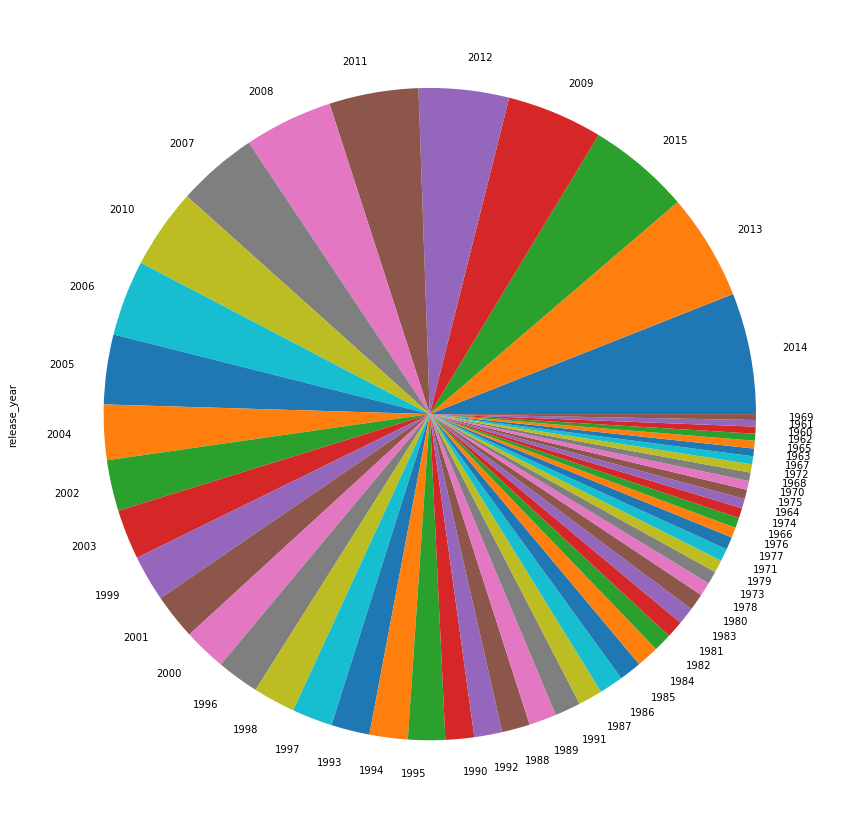

In [34]:
df['release_year'].value_counts().plot(kind = 'pie',figsize=(15,15))

#### observation
1- the year with the most number of movies is 2014 by 638 movies.
 
2- number of movies increase by a rate between 5% to 20% each year but not always.

### q4- what the average investment per year in the movies industry?

In [35]:
df.groupby('release_year')['budget'].mean()

release_year
1960    6.352316e+05
1961    1.647750e+06
1962    1.824071e+06
1963    2.220152e+06
1964    9.630039e+05
1965    2.127428e+06
1966    1.308064e+06
1967    2.960353e+06
1968    1.998306e+06
1969    1.678163e+06
1970    3.341104e+06
1971    1.407352e+06
1972    1.007757e+06
1973    1.185287e+06
1974    1.790000e+06
1975    1.406975e+06
1976    2.776136e+06
1977    2.992222e+06
1978    3.542322e+06
1979    4.718778e+06
1980    5.034722e+06
1981    4.508270e+06
1982    5.612756e+06
1983    7.000100e+06
1984    7.408458e+06
1985    7.474173e+06
1986    6.536030e+06
1987    6.804382e+06
1988    7.470192e+06
1989    9.047935e+06
1990    1.039312e+07
1991    1.309399e+07
1992    1.184438e+07
1993    1.058563e+07
1994    1.327321e+07
1995    1.769424e+07
1996    1.969275e+07
1997    2.690280e+07
1998    2.467989e+07
1999    2.830694e+07
2000    2.990326e+07
2001    2.830077e+07
2002    2.549151e+07
2003    2.857237e+07
2004    2.944764e+07
2005    2.394385e+07
2006    2.183625e+07


Text(0, 0.5, 'budget in million dollar')

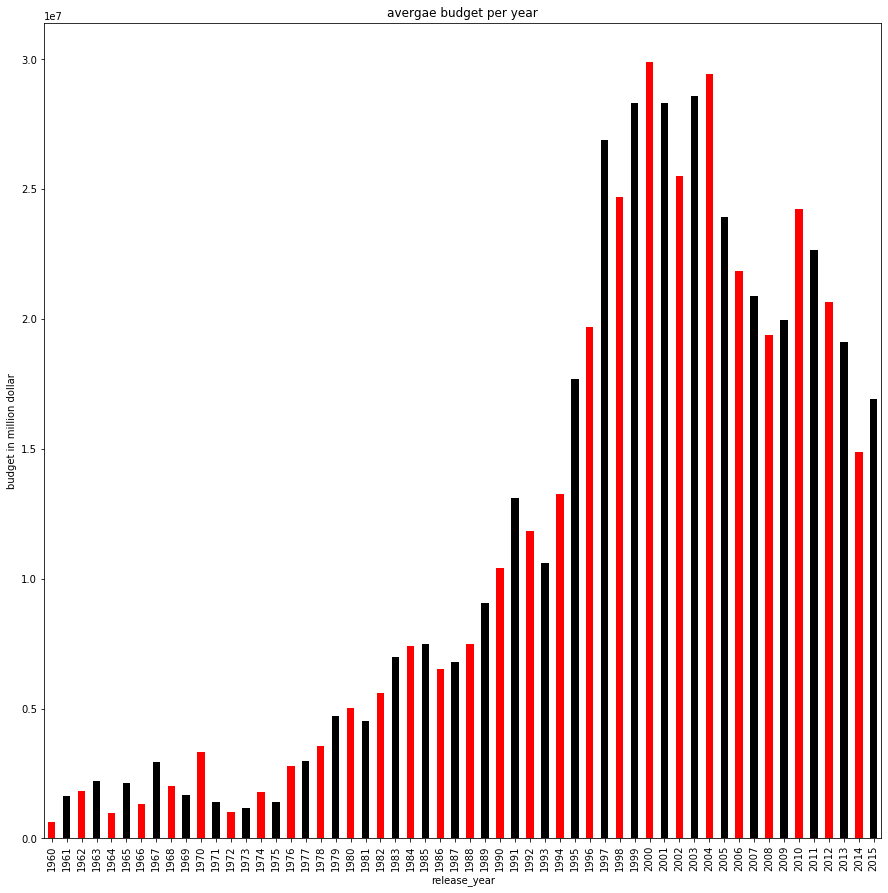

In [36]:
df.groupby('release_year')['budget'].mean().plot(kind = 'bar',figsize=(15,15), title = 'avergae budget per year', color = ['red','black'])
plt.ylabel('budget in million dollar')

#### observation
1- The year 2000 has the highest average budget.
 
2- the average budget was increasing till 2000 it started to decrease.

Text(0, 0.5, 'revenue in terms of tens of millions dollar')

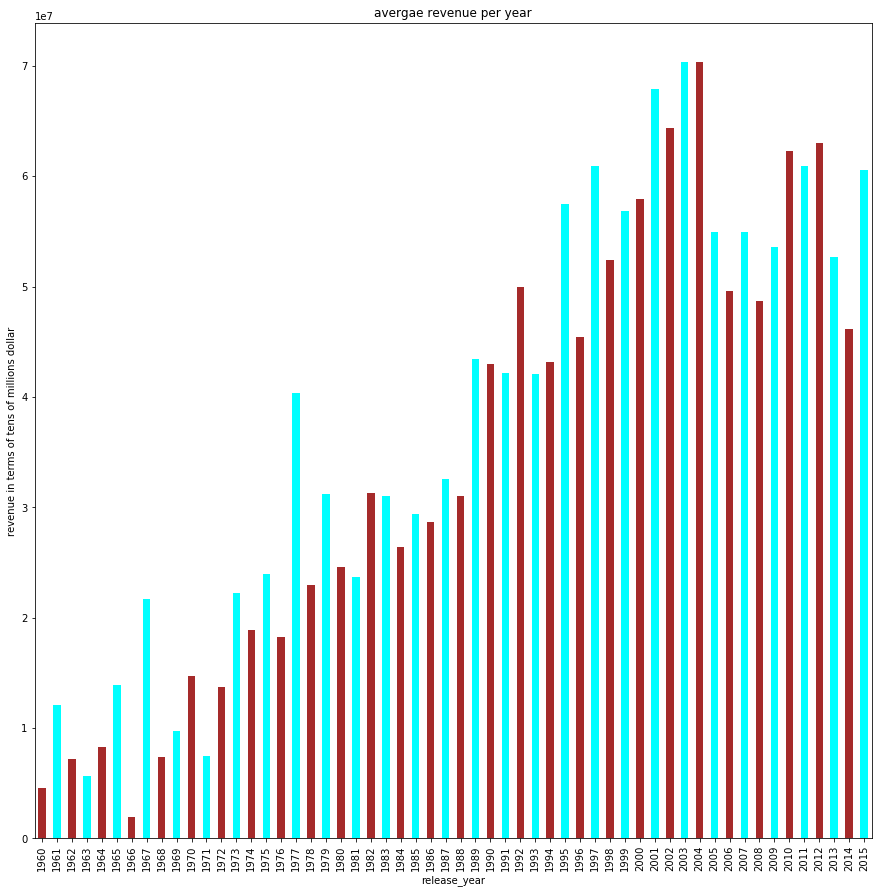

In [37]:
df.groupby('release_year')['revenue'].mean().plot(kind = 'bar',figsize=(15,15), title = 'avergae revenue per year',color = ['brown','cyan'])
plt.ylabel('revenue in terms of tens of millions dollar')

#### observation
both the two graphs are left skewed graphs.

### q5 - who is the director made more movies than others?

In [38]:
df['director'].value_counts()

Woody Allen                              40
Clint Eastwood                           33
Steven Spielberg                         29
Martin Scorsese                          26
Ridley Scott                             23
                                         ..
Oliver Parker|Barnaby Thompson            1
Melville Shavelson                        1
Danny Mooney                              1
Christopher Zalla                         1
Pixote Hunt|Joe Johnston|Maurice Hunt     1
Name: director, Length: 3951, dtype: int64

#### observation 
The director with the highest number of movies is Woody Allen with 42 movies followed by Clint Eastwood and Steven Spielberg.

### q6 and q7 - what is the longest  movie and average time of movie?

In [39]:
df['runtime'].max()

705

In [40]:
most = df.query('runtime == 877')
most

,imdb_id,original_title,release_date,runtime,director,cast,budget,revenue,earning,production_companies,genres,keywords,popularity,vote_average,vote_count,overview,release_year


### observation
taken was not a movie but a series of 10 episodes

In [41]:
df['runtime'].mean()

103.82998614958449

#### observation
Most movies last an average of an hour and 45 minuets.

### q8 - what are the movies made by Christopher Nolan and James Cameron(my fav diretor)?

In [42]:
df_JC = df.query('director == "James Cameron"')
df_JC

,imdb_id,original_title,release_date,runtime,director,cast,budget,revenue,earning,production_companies,genres,keywords,popularity,vote_average,vote_count,overview,release_year
1386,tt0499549,Avatar,2009-12-10,162,James Cameron,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,237000000,2781505847,2544505847,Ingenious Film Partners|Twentieth Century Fox ...,Action|Adventure|Fantasy|Science Fiction,culture clash|future|space war|space colony|so...,9.432768,7.1,8458,"In the 22nd century, a paraplegic Marine is di...",2009
4186,tt0111503,True Lies,1994-07-14,141,James Cameron,Arnold Schwarzenegger|Jamie Lee Curtis|Tom Arn...,115000000,378882411,263882411,Twentieth Century Fox Film Corporation|Lightst...,Action|Thriller,spy|terrorist|florida|gun|horseback riding,1.843243,6.6,620,Harry Tasker is a secret agent for the United ...,1994
5142,tt0297144,Ghosts of the Abyss,2003-04-10,92,James Cameron,Bill Paxton|John Broadwater|James Cameron|Mike...,13000000,17040871,4040871,Walt Disney Pictures|Walden Media|Earthship Pr...,Family|Documentary,diving|expedition|shipwreck|titanic|title spok...,0.253381,6.7,23,Academy AwardÂ® winning director and master st...,2003
5231,tt0120338,Titanic,1997-11-18,194,James Cameron,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,200000000,1845034188,1645034188,Paramount Pictures|Twentieth Century Fox Film ...,Drama|Romance|Thriller,shipwreck|iceberg|ship|panic|titanic,4.355219,7.3,4654,"84 years later, a 101-year-old woman named Ros...",1997
7882,tt0088247,The Terminator,1984-10-26,108,James Cameron,Arnold Schwarzenegger|Michael Biehn|Linda Hami...,6400000,78371200,71971200,Orion Pictures|Pacific Western|Hemdale Film|Ci...,Action|Thriller|Science Fiction,saving the world|artificial intelligence|rebel...,4.831966,7.1,2692,"In the post-apocalyptic future, reigning tyran...",1984
9189,tt0096754,The Abyss,1989-08-08,139,James Cameron,Ed Harris|Mary Elizabeth Mastrantonio|Michael ...,70000000,90000098,20000098,Twentieth Century Fox Film Corporation|Lightst...,Adventure|Action|Thriller|Science Fiction,ocean|sea|diving suit|flying saucer|nuclear mi...,1.691080,6.9,446,A civilian oil rig crew is recruited to conduc...,1989
9317,tt0103064,Terminator 2: Judgment Day,1991-07-01,137,James Cameron,Arnold Schwarzenegger|Linda Hamilton|Edward Fu...,100000000,520000000,420000000,Lightstorm Entertainment|Pacific Western|Canal...,Action|Thriller|Science Fiction,cyborg|shotgun|post-apocalyptic|dystopia|stabb...,3.584406,7.5,2836,Nearly 10 years have passed since Sarah Connor...,1991
10472,tt0090605,Aliens,1986-07-18,137,James Cameron,Sigourney Weaver|Carrie Henn|Michael Biehn|Lan...,18500000,131060248,112560248,Twentieth Century Fox Film Corporation|SLM Pro...,Horror|Action|Thriller|Science Fiction,android|extraterrestrial technology|space mari...,2.485419,7.6,2027,When Ripley's lifepod is found by a salvage cr...,1986


#### observation
James cameron started producing movies in 1981

In [43]:
df_CN = df.query('director == "Christopher Nolan"')
df_CN

,imdb_id,original_title,release_date,runtime,director,cast,budget,revenue,earning,production_companies,genres,keywords,popularity,vote_average,vote_count,overview,release_year
629,tt0816692,Interstellar,2014-11-05,169,Christopher Nolan,Matthew McConaughey|Jessica Chastain|Anne Hath...,165000000,621752480,456752480,Paramount Pictures|Legendary Pictures|Warner B...,Adventure|Drama|Science Fiction,saving the world|artificial intelligence|fathe...,24.949134,8.0,6498,Interstellar chronicles the adventures of a gr...,2014
1919,tt1375666,Inception,2010-07-14,148,Christopher Nolan,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,160000000,825500000,665500000,Legendary Pictures|Warner Bros.|Syncopy,Action|Thriller|Science Fiction|Mystery|Adventure,loss of lover|dream|sleep|subconsciousness|heist,9.363643,7.9,9767,"Cobb, a skilled thief who commits corporate es...",2010
2875,tt0468569,The Dark Knight,2008-07-16,152,Christopher Nolan,Christian Bale|Michael Caine|Heath Ledger|Aaro...,185000000,1001921825,816921825,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,Drama|Action|Crime|Thriller,dc comics|crime fighter|secret identity|scarec...,8.466668,8.1,8432,Batman raises the stakes in his war on crime. ...,2008
3955,tt0278504,Insomnia,2002-05-24,118,Christopher Nolan,Al Pacino|Robin Williams|Maura Tierney|Hilary ...,46000000,113714830,67714830,Section Eight|Alcon Entertainment|Witt/Thomas ...,Crime|Mystery|Thriller,detective|confession|fbi|homicide|blackmail,1.111488,6.6,564,Two Los Angeles homicide detectives are dispat...,2002
4363,tt1345836,The Dark Knight Rises,2012-07-16,165,Christopher Nolan,Christian Bale|Michael Caine|Gary Oldman|Anne ...,250000000,1081041287,831041287,Legendary Pictures|Warner Bros.|DC Entertainme...,Action|Crime|Drama|Thriller,dc comics|crime fighter|terrorist|secret ident...,6.591277,7.5,6723,Following the death of District Attorney Harve...,2012
6191,tt0372784,Batman Begins,2005-06-14,140,Christopher Nolan,Christian Bale|Michael Caine|Liam Neeson|Katie...,150000000,374218673,224218673,DC Comics|Legendary Pictures|Warner Bros.|DC E...,Action|Crime|Drama,martial arts|dc comics|crime fighter|secret id...,5.400826,7.3,4914,"Driven by tragedy, billionaire Bruce Wayne ded...",2005
6565,tt0482571,The Prestige,2006-10-19,130,Christopher Nolan,Hugh Jackman|Christian Bale|Michael Caine|Scar...,40000000,109676311,69676311,Touchstone Pictures|Syncopy,Drama|Mystery|Thriller,competition|secret|obsession|magic|dying and d...,2.582095,7.8,2519,A mysterious story of two magicians whose inte...,2006
8662,tt0209144,Memento,2000-10-11,113,Christopher Nolan,Guy Pearce|Carrie-Anne Moss|Joe Pantoliano|Mar...,9000000,39723096,30723096,Summit Entertainment|Newmarket Capital Group|T...,Mystery|Thriller,individual|insulin|tattoo|waitress|amnesia,3.095625,7.9,2144,Suffering short-term memory loss after a head ...,2000
9129,tt0154506,Following,1998-09-12,69,Christopher Nolan,Alex Haw|Lucy Russell|John Nolan|Dick Bradsell...,0,0,0,Syncopy|Next Wave Films,Crime|Drama|Thriller,london|robbery|burglar|prosecution|thief,0.225908,7.1,151,"A struggling, unemployed young writer takes to...",1998


#### observation
Christopher Nolan started producing movies in 1998

## Conclusion
- We learn alot of things from this data set as the most profitable film was the Avatar.
- Woody Allen the legendry director directed more than 40 movie.
- The average budget of the movies was in upscale trend till 2000 it started to decrease and keep the profit the same.
- popularity of the movies doesn't determined by number of votes or average rank but only by how the production companies promote to the movie.
- Not all the movies are profitable as some of them make great losses and fail in the box office.
- the number of movies increase by 5% to 20% each 2 years.
 
### limitations
- I deleted some columns as they seem to be unusable.
- by applying data wrangling techniques I droped rows with NaN values which may have some important incomplete information.
- the data have alot of movies made between 1960 and 2015 but not all of them also movies started in cinemas in 1895 and till now new movies are made.

In [45]:
df.to_csv('husien.csv', index = False)